In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
import glob
import hdf5_getters
import re

In [3]:
# build path dictionary
path_dict_song = {} 
basedir = "../MillionSongSubset/data/" 
ext = ".h5"
for root, dirs, files in os.walk(basedir):
    for f in files:
        path_track = os.path.join(root,f)
        track_ID = f.split('.')[0]
        path_dict_song[track_ID] = path_track

In [4]:
# build song to track dic:
count = 0
song_track_dic = {}
with open('taste_profile_song_to_tracks.txt') as f:
    for line in f:
#         print(line)
        count += 1
        if count < 0:
            break
        else: 
            valTuple = line.split('\t')
            if len(valTuple) > 1:
                songID = valTuple[0]
                trackID = valTuple[1].split('\n')[0]
                song_track_dic[songID] = trackID
# We have total 3 million song track data

In [5]:
songCSV = pd.read_csv('SongCSV.csv')

In [6]:
rebuild_user_song_dic = {}
count = 0
with open('user_songPath.txt') as f:
    for line in f:
        count += 1
        if count < 0:
            break
        line = line.split('\n')[0]
        list_item = line.split('\t')
        userID = list_item[0]
        pathLst = [list_item[i] for i in range(1, len(list_item)-1)]
        rebuild_user_song_dic[userID] = pathLst
        

In [7]:
len(rebuild_user_song_dic)
# filter top 10 users with path > 10
count = 0
top_10_users = []
for k,v in rebuild_user_song_dic.items():
    if count > 10:
        break
    if len(v) >= 10:
        count += 1
        top_10_users.append(k)

In [8]:
top_10_users

['a8bf4707ed61145d14e0809ff9e2eb47798ab4d9',
 'bca3ce112d47985c8a97d21e4760dd7eeea59ba8',
 '6497f7a1931d413f58219fcd8466387c072e2034',
 '56d654b6344da1e1bb7b32c38e8080165390853e',
 '0286664236daf43c94ef729d144282f78ba10b5d',
 '3d1afea4942aa7a198a7851f2358c7ee4816eb09',
 '3a34be849c7377037ecb43666ca8aa5988197128',
 '070d5d8b19a32f971dd407be54dfd451ea92791b',
 '7b095a7cc7616265c23e83f14130b6bd48b722d4',
 '1b0b983d1356635895b383c370f24c19ea009981',
 '1c0e2cb1ad64bf19c596693158817514c36c29ed']

In [9]:
len(rebuild_user_song_dic)
# filter top 10 users with path > 10
count = 0
top_100_users = []
for k,v in rebuild_user_song_dic.items():
    if count > 100:
        break
    if len(v) >= 10:
        count += 1
        top_100_users.append(k)
        


In [10]:
# build FV for each of the 10 users and dump into csv
songH5File = None
for user in top_10_users:
    # initialize
    # ....
    lst_songID = []
    lst_artistFamiliarity = []
    lst_artistHottness = []
    lst_artistName = []
    lst_duration = []
    lst_dancebility = []
    lst_endOfFadeIn = []
    lst_energy = []
    lst_loudness = []
    lst_songHotness = []
    lst_tempo = []
    lst_songTitle = []
    # ....
    
    trackPaths = rebuild_user_song_dic[user]
    for track in trackPaths:
        # read the .h5 file
        songH5File = hdf5_getters.open_h5_file_read(track)
        
        songID = str(hdf5_getters.get_song_id(songH5File))
        lst_songID.append(songID)
        
        artistFamiliarity = hdf5_getters.get_artist_familiarity(songH5File)
        lst_artistFamiliarity.append(artistFamiliarity)
        
        artistHottness = hdf5_getters.get_artist_hotttnesss(songH5File)
        lst_artistHottness.append(artistHottness)
        
        artistName = hdf5_getters.get_artist_name(songH5File)
        lst_artistName.append(artistName)
        
        duration = hdf5_getters.get_duration(songH5File)
        lst_duration.append(duration)
        
        dancebility = hdf5_getters.get_danceability(songH5File)
        lst_dancebility.append(dancebility)
        
        endOfFadeIn = hdf5_getters.get_end_of_fade_in(songH5File)
        lst_endOfFadeIn.append(endOfFadeIn)
        
        energy = hdf5_getters.get_energy(songH5File)
        lst_energy.append(energy)
        
        loudness = hdf5_getters.get_loudness(songH5File)
        lst_loudness.append(loudness)
        
        songHotness = hdf5_getters.get_song_hotttnesss(songH5File)
        lst_songHotness.append(songHotness)
        
        tempo = hdf5_getters.get_tempo(songH5File)
        lst_tempo.append(tempo)
        
        songTitle = hdf5_getters.get_title(songH5File)
        lst_songTitle.append(songTitle)
        
        
        
    # construct dataframe for this user
    userFV = pd.DataFrame({'songID': lst_songID, 'artistFamiliarity': lst_artistFamiliarity, 'artistHottness': lst_artistHottness,
                         'artistName': lst_artistName, 'duration': lst_duration, 'dancebility': lst_dancebility,
                         'endOfFadeIn': lst_endOfFadeIn, 'energy': lst_energy, 'loudness': lst_loudness, 'songHotness': lst_songHotness,
                         'tempo': lst_tempo, 'songTitle': lst_songTitle})
    outputFile = user + '_FV.csv'
    userFV.to_csv(outputFile)


In [11]:
len(rebuild_user_song_dic)
# filter top 10 users with path > 10
count = 0
top_100_users = []
for k,v in rebuild_user_song_dic.items():
    if count > 25:
        break
    if len(v) >= 10:
        count += 1
        top_100_users.append(k)
        


In [12]:
# build FV for each of the 10 users and dump into csv
songH5File = None
all_energy = []
all_songID = []
all_artistFamiliarity = []
all_artistHottness = []
all_artistName = []
all_duration = []
all_dancebility = []
all_endOfFadeIn = []
    
all_loudness = []
all_songHotness = []
all_tempo = []
all_songTitle = []
for user in top_100_users:
    
    trackPaths = rebuild_user_song_dic[user]
    for track in trackPaths:
        # read the .h5 file
        songH5File = hdf5_getters.open_h5_file_read(track)
        
        loudness = hdf5_getters.get_loudness(songH5File)
        all_loudness.append(loudness)
        
        songHotness = hdf5_getters.get_song_hotttnesss(songH5File)
        all_songHotness.append(songHotness)
        
        tempo = hdf5_getters.get_tempo(songH5File)
        all_tempo.append(tempo)
        
        artistFamiliarity = hdf5_getters.get_artist_familiarity(songH5File)
        all_artistFamiliarity.append(artistFamiliarity)
        
        artistName = hdf5_getters.get_artist_name(songH5File)
        all_artistName.append(artistName)

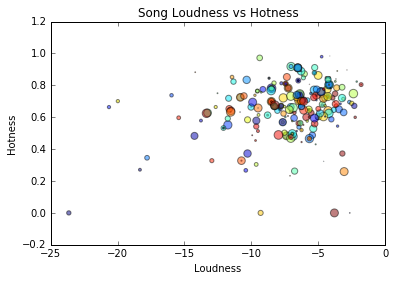

In [22]:
N = len(all_loudness)
x = all_loudness
y = all_songHotness
colors = np.random.rand(N)
area = np.pi * (5 * np.random.rand(N))**2  # 0 to 5 point radiuses

fig = plt.gcf()

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.scatter(x, y, c=colors, alpha=0.5)
plt.xlabel('Loudness')
plt.ylabel('Hotness')
plt.title('Song Loudness vs Hotness')
plt.show()

fig.savefig('Plots/Song Loudness vs Hotness.png',dpi=100)

plt.clf()
plt.cla()
plt.close()

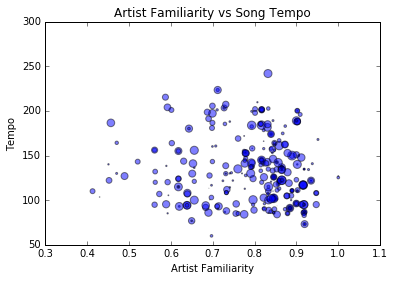

In [21]:
N = len(all_loudness)
x = all_artistFamiliarity
y = all_tempo
colors = np.random.rand(N)
area = np.pi * (5 * np.random.rand(N))**2  # 0 to 5 point radiuses

fig = plt.gcf()

plt.scatter(x, y, s=area, alpha=0.5)
#plt.scatter(x, y, c=colors, alpha=0.5)
plt.xlabel('Artist Familiarity')
plt.ylabel('Tempo')
plt.title('Artist Familiarity vs Song Tempo')
plt.show()
fig.savefig('Plots/Artist Familiarity vs Song Tempo.png',dpi=100)



plt.clf()
plt.cla()
plt.close()


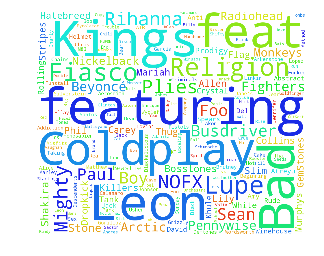

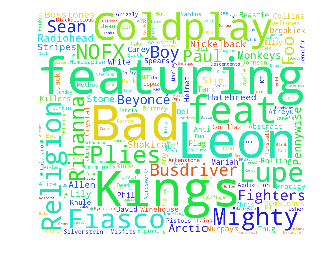

In [20]:
from os import path
from wordcloud import WordCloud, STOPWORDS



# Read the whole text.
#text = open('constitution.txt').read()
text= ', '.join(str(e.decode("utf-8")) for e in all_artistName)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
fig = plt.gcf()

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.draw()
fig.savefig('Plots/all_artist_cloud1.png',dpi=100)

plt.clf()
plt.cla()
plt.close()
# lower max_font_size
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000,
                          max_font_size=250).generate(text)

fig = plt.gcf()

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.draw()
fig.savefig('Plots/all_artist_cloud2.png',dpi=100)

plt.clf()
plt.cla()
plt.close()